## 1. Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

from collections import Counter

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## 2. Loading Data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
print(train.shape)
print(test.shape)

(7352, 563)
(999, 563)


In [5]:
train.subject.value_counts()

25    409
21    408
26    392
30    383
28    382
27    376
23    372
17    368
16    366
19    360
1     347
29    344
3     341
15    328
6     325
14    323
22    321
11    316
7     308
5     302
8     281
Name: subject, dtype: int64

In [6]:
train.subject.value_counts().sum()

7352

## 3. Data Preprocessing

Checking for duplicates

In [7]:
print('Number of duplicates in train :',train.duplicated().sum())
print('Number of duplicates in test :',test.duplicated().sum())

Number of duplicates in train : 0
Number of duplicates in test : 0


Checking for missing values

In [8]:
print('Number of missing values in train :',train.isna().values.sum())
print('Number of missing values in test :',test.isna().values.sum())

Number of missing values in train : 0
Number of missing values in test : 0


Checking for class imbalance in different activities

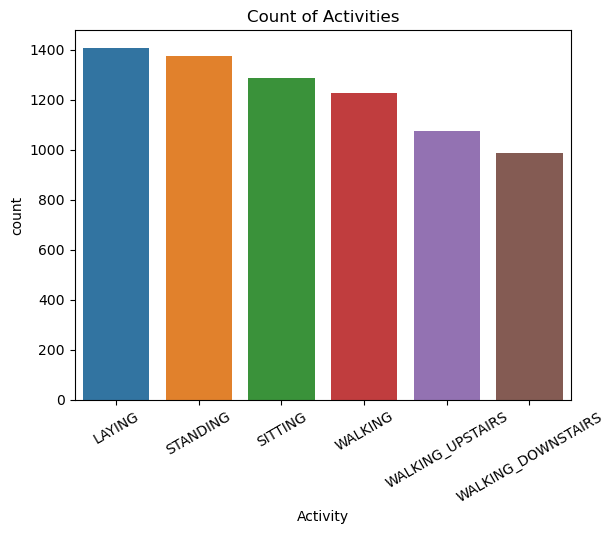

In [9]:
sns.countplot(x=train.Activity,order = train.Activity.value_counts().index)
plt.title('Count of Activities')
plt.xticks(rotation=30)
plt.show()

No class imbalance as there are almost same number of observations across all activites

In [10]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


## 4. Exploratory Data Analysis

Finding no of different parameters deciding the activity

In [11]:
"tBodyAcc-mean()-X".split('-')[0]

'tBodyAcc'

In [12]:
"angle(tBodyAccMean,gravity)".split('-')[0].split('(')[0]

'angle'

In [13]:
[print(col) for col in train.columns]

tBodyAcc-mean()-X
tBodyAcc-mean()-Y
tBodyAcc-mean()-Z
tBodyAcc-std()-X
tBodyAcc-std()-Y
tBodyAcc-std()-Z
tBodyAcc-mad()-X
tBodyAcc-mad()-Y
tBodyAcc-mad()-Z
tBodyAcc-max()-X
tBodyAcc-max()-Y
tBodyAcc-max()-Z
tBodyAcc-min()-X
tBodyAcc-min()-Y
tBodyAcc-min()-Z
tBodyAcc-sma()
tBodyAcc-energy()-X
tBodyAcc-energy()-Y
tBodyAcc-energy()-Z
tBodyAcc-iqr()-X
tBodyAcc-iqr()-Y
tBodyAcc-iqr()-Z
tBodyAcc-entropy()-X
tBodyAcc-entropy()-Y
tBodyAcc-entropy()-Z
tBodyAcc-arCoeff()-X,1
tBodyAcc-arCoeff()-X,2
tBodyAcc-arCoeff()-X,3
tBodyAcc-arCoeff()-X,4
tBodyAcc-arCoeff()-Y,1
tBodyAcc-arCoeff()-Y,2
tBodyAcc-arCoeff()-Y,3
tBodyAcc-arCoeff()-Y,4
tBodyAcc-arCoeff()-Z,1
tBodyAcc-arCoeff()-Z,2
tBodyAcc-arCoeff()-Z,3
tBodyAcc-arCoeff()-Z,4
tBodyAcc-correlation()-X,Y
tBodyAcc-correlation()-X,Z
tBodyAcc-correlation()-Y,Z
tGravityAcc-mean()-X
tGravityAcc-mean()-Y
tGravityAcc-mean()-Z
tGravityAcc-std()-X
tGravityAcc-std()-Y
tGravityAcc-std()-Z
tGravityAcc-mad()-X
tGravityAcc-mad()-Y
tGravityAcc-mad()-Z
tGravityAcc-m

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [14]:
[col.split('-')[0].split('(')[0] for col in train.columns]

['tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',


In [15]:
count = Counter([col.split('-')[0].split('(')[0] for col in train.columns])

count

Counter({'tBodyAcc': 40,
         'tGravityAcc': 40,
         'tBodyAccJerk': 40,
         'tBodyGyro': 40,
         'tBodyGyroJerk': 40,
         'tBodyAccMag': 13,
         'tGravityAccMag': 13,
         'tBodyAccJerkMag': 13,
         'tBodyGyroMag': 13,
         'tBodyGyroJerkMag': 13,
         'fBodyAcc': 79,
         'fBodyAccJerk': 79,
         'fBodyGyro': 79,
         'fBodyAccMag': 13,
         'fBodyBodyAccJerkMag': 13,
         'fBodyBodyGyroMag': 13,
         'fBodyBodyGyroJerkMag': 13,
         'angle': 7,
         'subject': 1,
         'Activity': 1})

In [16]:
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in train.columns]),orient='index').sort_values(by=0,ascending=False)

,0
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


In [17]:
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in train.columns]),orient='index').sort_values(by=0,ascending=False).rename(columns={0:'count'})

,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


Analysing tBodyAccMag-mean feature

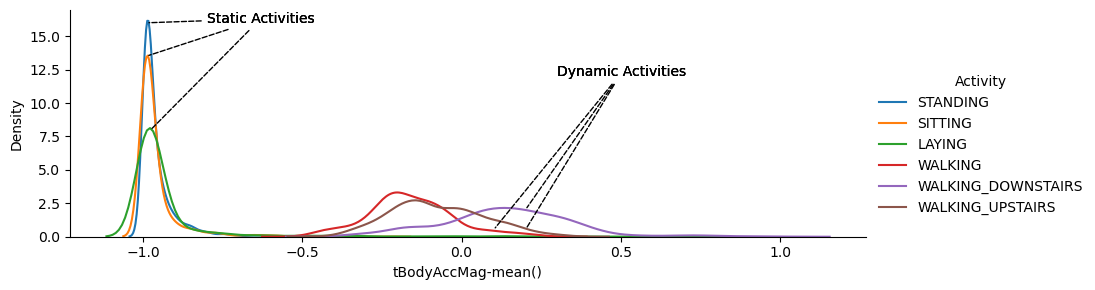

In [18]:
facetgrid = sns.FacetGrid(train,hue='Activity',aspect=3)
facetgrid.map(sns.distplot, 'tBodyAccMag-mean()',hist=False).add_legend()

plt.annotate('Static Activities',xy=(-.98,7.9),xytext=(-.8,16),arrowprops={'arrowstyle':'-','ls':'dashed'})
plt.annotate('Static Activities',xy=(-.99,13.5),xytext=(-.8,16),arrowprops={'arrowstyle':'-','ls':'dashed'})
plt.annotate('Static Activities',xy=(-.99,16),xytext=(-.8,16),arrowprops={'arrowstyle':'-','ls':'dashed'})

plt.annotate('Dynamic Activities',xy=(0.2,0.5),xytext=(0.3,12),arrowprops={'arrowstyle':'-','ls':'dashed'})
plt.annotate('Dynamic Activities',xy=(0.1,0.5),xytext=(0.3,12),arrowprops={'arrowstyle':'-','ls':'dashed'})
plt.annotate('Dynamic Activities',xy=(0.2,2),xytext=(0.3,12),arrowprops={'arrowstyle':'-','ls':'dashed'})


plt.show()

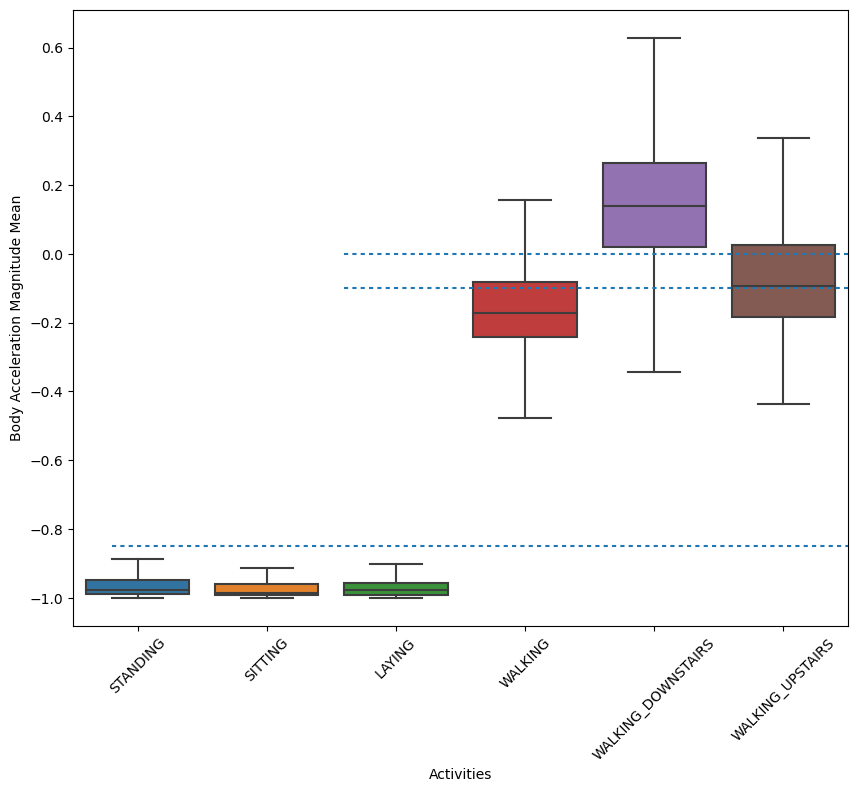

In [19]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Activity',y='tBodyAccMag-mean()',data=train,showfliers=False)
plt.ylabel('Body Acceleration Magnitude Mean')
plt.xlabel('Activities')
plt.xticks(rotation=45)
plt.axhline(y=-.85,xmin=0.05,dashes=(2,2))
plt.axhline(y=0.0,xmin=0.35,dashes=(2,2))
plt.axhline(y=-.1,xmin=0.35,dashes=(2,2))
plt.show()

Analysing angle between x-axis and gravity mean feature

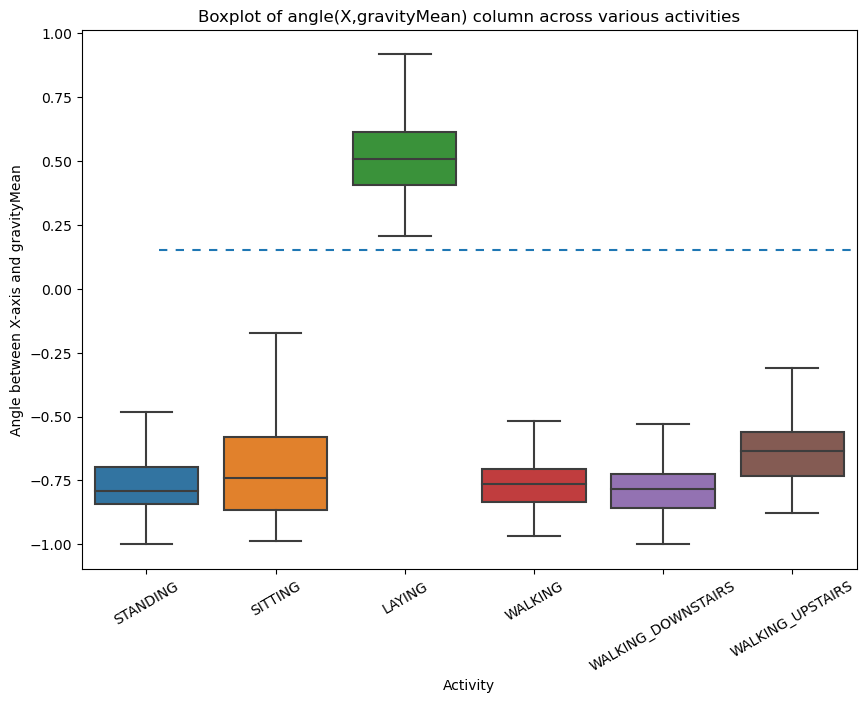

In [20]:
plt.figure(figsize=(10,7))
sns.boxplot(data=train,x='Activity',y='angle(X,gravityMean)',showfliers=False)
plt.ylabel('Angle between X-axis and gravityMean')
plt.title('Boxplot of angle(X,gravityMean) column across various activities')
plt.xticks(rotation=30)
plt.axhline(y=0.15,xmin=0.1,dashes=(4,4))
plt.show()


Analysing angle between x-axis and gravity mean feature

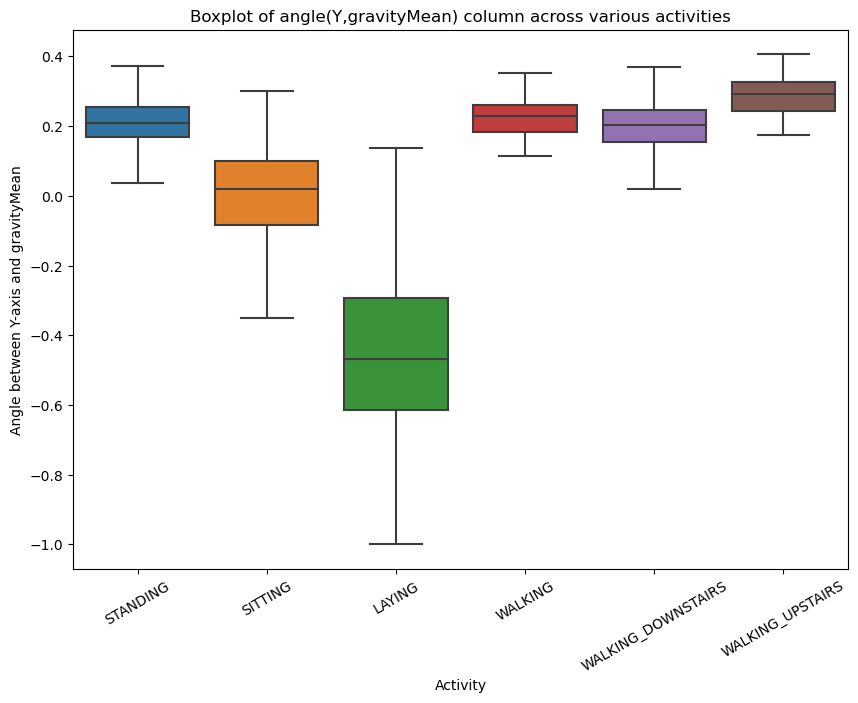

In [21]:
plt.figure(figsize=(10,7))
sns.boxplot(data=train,x='Activity',y='angle(Y,gravityMean)',showfliers=False)
plt.ylabel('Angle between Y-axis and gravityMean')
plt.title('Boxplot of angle(Y,gravityMean) column across various activities')
plt.xticks(rotation=30)
plt.show()


#### Visualising data using PCA

In [22]:
x_for_pca = train.drop(['subject','Activity'],axis=1)

In [23]:
pca = PCA(n_components=2,random_state=0).fit_transform(x_for_pca)

In [24]:
pca

array([[-5.5202803 , -0.29027701],
       [-5.53534954, -0.08253011],
       [-5.47498801,  0.28738703],
       ...,
       [ 5.85750527, -3.08184312],
       [ 5.42109482, -3.42643002],
       [ 5.49797027, -2.78992867]])

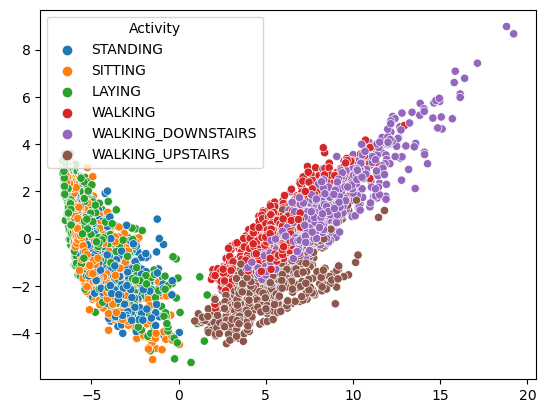

In [25]:
sns.scatterplot(x=pca[:,0],y=pca[:,1],hue=train['Activity'])
plt.show()

#### Visualising data using t-SNE

In [26]:
x_for_tsne = train.drop(['subject','Activity'],axis=1)
tsne = TSNE(n_components=2,random_state=0,n_iter=1000).fit_transform(x_for_tsne)

In [27]:
tsne

array([[ -6.9932804, -63.188377 ],
       [-25.07103  , -17.728373 ],
       [-27.199108 , -20.449244 ],
       ...,
       [ 23.136957 , -60.145756 ],
       [ 23.117773 , -59.890156 ],
       [ 23.605974 , -59.11817  ]], dtype=float32)

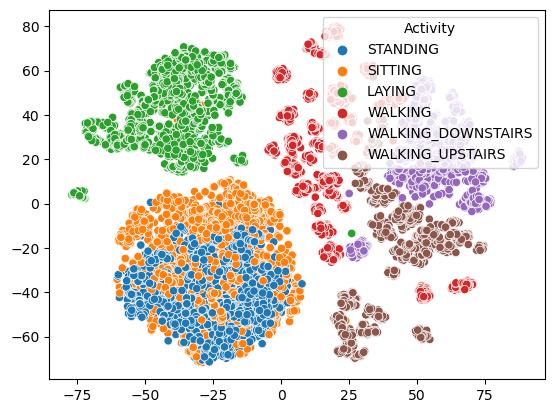

In [28]:
sns.scatterplot(x=tsne[:,0],y=tsne[:,1],hue=train['Activity'])
plt.show()

### 5. Modelling

In [29]:
x_train = train.drop(['subject','Activity'],axis=1)
y_train = train.Activity

x_test = test.drop(['subject','Activity'],axis=1)
y_test = test.Activity

In [30]:
print('Training data shape:',x_train.shape)
print('Testing data shape:',x_test.shape)

Training data shape: (7352, 561)
Testing data shape: (999, 561)


### Logistic Regression

In [31]:
params = {'max_iter':[100,200,500]}

lr_classifier = LogisticRegression()

## cross validation and hyperparameter tuning using randomised search
lr_classifier_rs = RandomizedSearchCV(lr_classifier,cv=5,param_distributions=params,random_state=42)

lr_classifier_rs.fit(x_train,y_train)
y_pred = lr_classifier_rs.predict(x_test)

In [32]:
print('Best Parameter:',lr_classifier_rs.best_params_)
print('Best Estimator:',lr_classifier_rs.best_estimator_)

Best Parameter: {'max_iter': 200}
Best Estimator: LogisticRegression(max_iter=200)


In [33]:
lr_accuracy = accuracy_score(y_pred,y_test)
print('Accuracy using Logistic Regression:',lr_accuracy)

Accuracy using Logistic Regression: 0.954954954954955


In [34]:
cm = confusion_matrix(y_test.values,y_pred)
cm

array([[183,   0,   0,   0,   0,   0],
       [  0, 146,  21,   0,   0,   3],
       [  0,   8, 170,   0,   0,   0],
       [  0,   0,   0, 185,   0,   0],
       [  0,   0,   0,   0, 134,   0],
       [  0,   0,   0,  13,   0, 136]], dtype=int64)

In [35]:
def plot_confusion_matrix(cm,labels):
    fig,ax = plt.subplots(figsize=(12,8))
    im = ax.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)
    ax.figure.colorbar(im,ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
    yticks = np.arange(cm.shape[0]),
    xticklabels=labels,yticklabels=labels,
    ylabel='True Label',
    xlabel ='Predicted Label')
    plt.xticks(rotation=90)
    thresh = cm.max()/2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j,i,int(cm[i,j]),ha='center',va='center',color='white' if cm[i,j]>thresh else 'black')
    fig.tight_layout()       
    

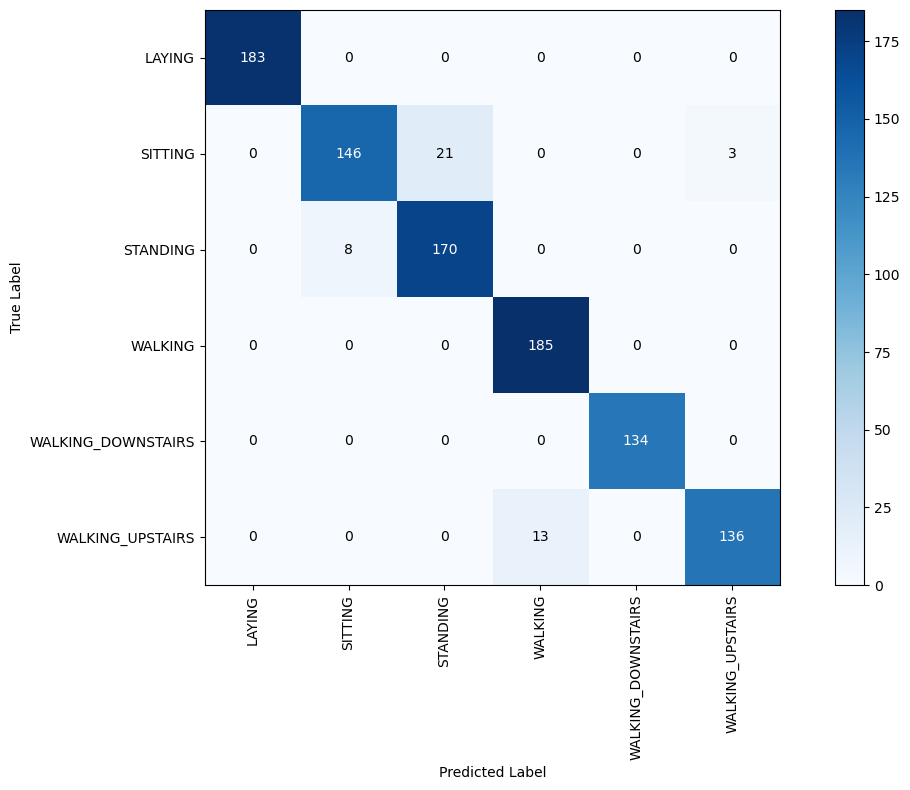

In [36]:
plot_confusion_matrix(cm,np.unique(y_pred))

### SVM

In [37]:
params = {
    'kernel':['linear','rbf','poly','sigmoid'],
    'C':[100,50]
}

In [38]:
svm_rs = RandomizedSearchCV(SVC(),param_distributions=params,cv=5,random_state=42)

In [39]:
svm_rs.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [100, 50],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   random_state=42)

In [40]:
svm_ypred = svm_rs.predict(x_test)

In [41]:
print('Best Parameter:',svm_rs.best_params_)
print('Best Estimator:',svm_rs.best_estimator_)

Best Parameter: {'kernel': 'rbf', 'C': 100}
Best Estimator: SVC(C=100)


In [42]:
print('Accuracy Score:',accuracy_score(svm_ypred,y_test))

Accuracy Score: 0.9679679679679679


In [44]:
cm = confusion_matrix(y_test.values,svm_ypred)
cm

array([[183,   0,   0,   0,   0,   0],
       [  0, 149,  19,   0,   0,   2],
       [  0,   5, 173,   0,   0,   0],
       [  0,   0,   0, 185,   0,   0],
       [  0,   0,   0,   0, 134,   0],
       [  0,   0,   0,   6,   0, 143]], dtype=int64)

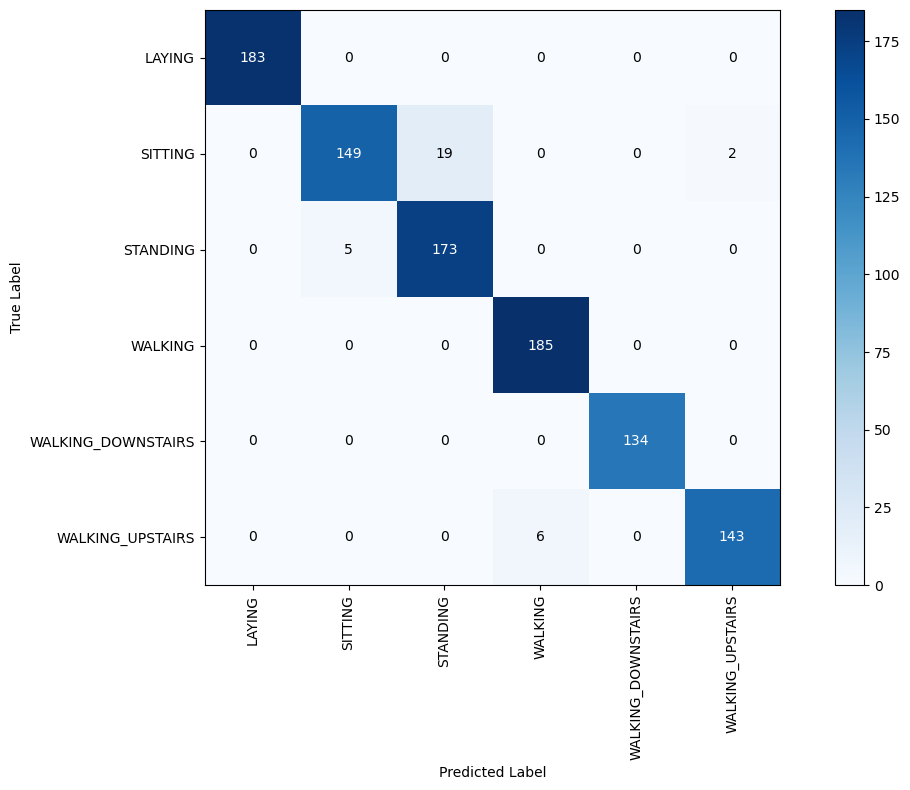

In [45]:
plot_confusion_matrix(cm,np.unique(y_pred))